# IAA primera etapa

En esta notebook vamos a ver cuánto estuvieron de acuerdo los etiquetadores 

Primero, carguemos el excel con las etiquetas

In [1]:
import pandas as pd
import sklearn

names = ["id", "titulo", "FdT", "JxC", "Lavagna", "FIT", "Espert", "Centurión"]
dfs = {
    (i-1):pd.read_excel(
        "../data/titulares_etiquetados_150.xlsx", 
        sheet_name=i, names=names, index_col="id"
    )[3:]
    
    for i in [1, 2, 3]
}



label_cols = names[2:]

df = dfs[0].join(dfs[1], lsuffix="_1", rsuffix="_2")
df = df.join(dfs[2], rsuffix="_3")

del df['titulo_2']
del df['titulo']
df.rename({"titulo_1": "titulo"}, axis=1, inplace=True)

for label in label_cols:
    df.rename({label: f"{label}_3"}, axis=1, inplace=True)
    
df.columns

Index(['titulo', 'FdT_1', 'JxC_1', 'Lavagna_1', 'FIT_1', 'Espert_1',
       'Centurión_1', 'FdT_2', 'JxC_2', 'Lavagna_2', 'FIT_2', 'Espert_2',
       'Centurión_2', 'FdT_3', 'JxC_3', 'Lavagna_3', 'FIT_3', 'Espert_3',
       'Centurión_3'],
      dtype='object')

Hagamos un label que contenga todas las fuerzas que etiquetaron 

In [2]:
import numpy as np

rows = []

def get_labelled(row):
    ret = []
    for col in label_cols:
        if type(row[col]) is str:
            ret.append(col)
    return ",".join(ret)


annot_cols = ["annot_1", "annot_2", "annot_3"]

for i, annotator_df in dfs.items():
    df[f"annot_{i+1}"] = annotator_df.apply(get_labelled, axis=1)

¿Cuántos no etiquetaron?

In [3]:
print(f"Anotador 1 le faltó etiquetar: {sum(df['annot_1'] == '')}")
print(f"Anotador 2 le faltó etiquetar: {sum(df['annot_2'] == '')}")
print(f"Anotador 3 le faltó etiquetar: {sum(df['annot_3'] == '')}")


Anotador 1 le faltó etiquetar: 24
Anotador 2 le faltó etiquetar: 13
Anotador 3 le faltó etiquetar: 17


In [4]:
pd.set_option("max_colwidth",  200)
df[(df['annot_1'] == '') | (df["annot_2"] == '') | (df["annot_3"] == '')][["titulo"] + annot_cols]

,titulo,annot_1,annot_2,annot_3
id,,,,
1812,"El partido del odio marcha con Macri, pero revolotea a Alberto F.",,"FdT,JxC","FdT,JxC"
18850,Asaltaron y golpearon a un hermano del presidente Macri,,JxC,JxC
17670,Un explorador chino intentará cruzar la Antártida solo y sin ayuda para concientizar sobre el cambio climático,,,
6579,Conferencia Nacional del PTR de Chile: las tareas de la izquierda revolucionaria,,FIT,
11029,"Alberto Maques: “Cuando los jueces nacionales pasen a la ciudad no van a querer volver, es como pasar de turista a primera”",,JxC,
7205,"Cómo es FORUM, la nueva misión que medirá dato clave en el cambio climático",,,
4411,Escándalo de dopaje de Alberto Salazar: la USADA reveló que Nike sabía de los experimentos con sustancias del polémico entrenador,,,
785,Las claves de la renegociación de la deuda que hizo Uruguay y resaltó Alberto Fernández,,FdT,FdT
17642,Campaña en terreno hostil: Mauricio Macri en Rosario y Alberto Fernández en La Plata,,"FdT,JxC","FdT,JxC"


¿Cuáles son?

# Agreements

Veamos qué tanto acuerdo hay por cada fuerza

In [110]:
from sklearn.metrics import cohen_kappa_score

for label in label_cols:
    print(label)
    
    coder1 = df[f"{label}_1"].notna().values
    coder2 = df[f"{label}_2"].notna().values
    coder3 = df[f"{label}_3"].notna().values
    formatted_codes = [[1,i,coder1[i]] for i in range(len(coder1))] +\
        [[2,i,coder2[i]] for i in range(len(coder2))] +\
        [[3,i,coder3[i]] for i in range(len(coder3))]
    
    
    ratingtask = agreement.AnnotationTask(data=formatted_codes)
    
    print(f"Fleiss Kappa sobre etiquetar {label:<12}: {ratingtask.kappa():.3f}")


FdT
Fleiss Kappa sobre etiquetar FdT         : 0.766
JxC
Fleiss Kappa sobre etiquetar JxC         : 0.818
Lavagna
Fleiss Kappa sobre etiquetar Lavagna     : 0.946
FIT
Fleiss Kappa sobre etiquetar FIT         : 0.811
Espert
Fleiss Kappa sobre etiquetar Espert      : 0.493
Centurión
Fleiss Kappa sobre etiquetar Centurión   : -0.003


mmmm, debería dar mejor!

In [5]:
def anyone_annotated(label):
    labels = [f"{label}_1", f"{label}_2", f"{label}_3"]
    
    ret = df[labels[0]].notna() | df[labels[1]].notna() | df[labels[2]].notna()
    
    return df.loc[ret, ["titulo"] + labels]

anyone_annotated("Espert")

,titulo,Espert_1,Espert_2,Espert_3
id,,,,
4783,Exclusivo: ¿por qué se “indigestó” Espert con el libro de Nico del Caño?,NaN,NEG,NEU
20724,"Espert, a los gritos, retó a sus fans: les dijo que ""les falta calle"" y se hizo viral",NEG,NaN,NEG
20871,Espert trata a votantes de “mugre” y dice a sus seguidores que se “prostituyan” en política,NEG,NEG,NaN


In [6]:

anyone_annotated("FIT")

,titulo,FIT_1,FIT_2,FIT_3
id,,,,
7340,La Izquierda realizó un acto en la 9 de Julio y apuntó contra Macri y Fernández,POS,POS,POS
7896,Salta: votaron Pablo López y Daniela Planes de la lista Unidad del Frente de Izquierda,POS,POS,NEU
15707,Varela: gran elección de la izquierda en Centro de Estudiantes del ISFD 54,POS,NEU,POS
6579,Conferencia Nacional del PTR de Chile: las tareas de la izquierda revolucionaria,NaN,NEU,NaN
22461,Votó Alejandro Vilca y aseguró que “la izquierda se prepara para enfrentar el ajuste que se viene”,POS,NEU,POS
5678,[VIDEO] Nicolás del Caño presenta su libro en Buenos Aires,POS,NEU,NEU
4783,Exclusivo: ¿por qué se “indigestó” Espert con el libro de Nico del Caño?,NaN,NEU,NEG
17094,"Con el resultado cantado, la izquierda apunta al día después",POS,POS,POS
21786,"Elecciones 2019: si Alberto Fernández gana “no tendrá 100 días” para definir medidas, advirtió el FIT",POS,NaN,POS


In [7]:
anyone_annotated("Centurión")

,titulo,Centurión_1,Centurión_2,Centurión_3
id,,,,
18999,Candidato a gobernador del Frente NOS pide votar a Macri en vez de Gómez Centurión,NaN,NaN,NEG
13804,"Tras el debate presidencial, Mauricio Macri cruzó a Alberto Fernández: “Piensa que puede decir cualquier mentira”",NaN,NEG,NaN
20871,Espert trata a votantes de “mugre” y dice a sus seguidores que se “prostituyan” en política,NaN,NaN,NEG


Ok, quedémonos sólo con aquellas etiquetas del etiquetador 1 y etiquetador2?

In [9]:
from nltk import agreement

def my_fleiss_kappa(*coders):
    formatted_codes = []
    for num_coder, coder in enumerate(coders):
        for i in range(len(coder)):
            formatted_codes.append([num_coder+1,i,coder[i]])
    return agreement.AnnotationTask(data=formatted_codes).kappa()


In [10]:
def convert_to_num(col):
    ret = 1.0 * (df[col] == 'POS')
    
    ret[df[col] == 'NEG'] = -1.0
    
    return ret.values

def mae(X1, X2):
    assert X1.shape == X2.shape
    return abs(X1 - X2).mean()


for label in label_cols:
    labels = [f"{label}_1", f"{label}_2", f"{label}_3"]
    matching = df[labels[0]].notna() & df[labels[1]].notna() & df[labels[2]].notna()
    print("=*"*50)
    print(label)
    print(sum(matching))
    
    if not any(matching):
        print("No match -- skipping")
        continue
    
    coder1 = df.loc[matching, f"{label}_1"].values
    coder2 = df.loc[matching, f"{label}_2"].values
    coder3 = df.loc[matching, f"{label}_3"].values
    kappa = my_fleiss_kappa(coder1, coder2, coder3)
    kappa_2_y_3 = my_fleiss_kappa(coder2, coder3)
    print(f"Kappa               : {kappa:.3f}")
    print(f"Kappa (entre 2 y 3) : {kappa_2_y_3:.3f}")
    num_coders = [
        convert_to_num(label) for label in labels
    ]
    
    for i in range(3):
        for j in range(i+1, 3):
            print(f"MAE entre anotadores {i+1} y {j+1}: {mae(num_coders[i], num_coders[j]):.3f}")
    
    
    try:
        kappa_nonneg = my_fleiss_kappa(coder1 != "NEG", coder2 != "NEG", coder3 != "NEG")
        print(f"Kappa {'nonneg':<6} : {kappa_nonneg:.3f}")
    except ZeroDivisionError as e:
        print("No se pudo calcular el kappa non neg")
    

=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
FdT
53
Kappa               : 0.236
Kappa (entre 2 y 3) : 0.264
MAE entre anotadores 1 y 2: 0.282
MAE entre anotadores 1 y 3: 0.329
MAE entre anotadores 2 y 3: 0.329
Kappa nonneg : 0.268
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
JxC
53
Kappa               : 0.278
Kappa (entre 2 y 3) : 0.322
MAE entre anotadores 1 y 2: 0.383
MAE entre anotadores 1 y 3: 0.275
MAE entre anotadores 2 y 3: 0.255
Kappa nonneg : 0.325
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
Lavagna
6
Kappa               : 0.353
Kappa (entre 2 y 3) : 0.143
MAE entre anotadores 1 y 2: 0.007
MAE entre anotadores 1 y 3: 0.013
MAE entre anotadores 2 y 3: 0.020
No se pudo calcular el kappa non neg
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
FIT
10
Kappa       

## Matrices de confusión para FdT

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

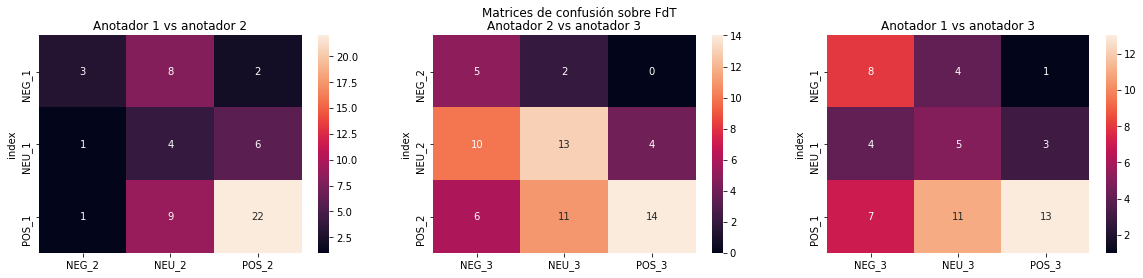

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def conf_matrix(label, idx1, idx2):
    label1, label2 = f"{label}_{idx1}", f"{label}_{idx2}"
    
    matching_fdt = df[label1].notna() & df[label2].notna()
    sub_df = df.loc[matching_fdt]
    cm = confusion_matrix(sub_df[label1], sub_df[label2], labels=labels)

    dd = pd.DataFrame(cm, columns=[f"{l}_{idx2}" for l in labels])
    dd["index"] = [f"{l}_{idx1}" for l in labels]
    dd.set_index("index", inplace=True)
    
    return dd


label = "FdT"


fig = plt.figure(figsize=(20, 4))
fig.suptitle("Matrices de confusión sobre FdT")

labels = ["NEG", "NEU", "POS"]


plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 2, 3), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 3), annot=True)

A ver, anotador 1 y anotador 2 parecen matchear bastante.

Fijémonos igual ese cuadrante de NEU para 2 y POS para 1

In [198]:
df[(df["FdT_1"] == "POS") & (df["FdT_2"] == "NEU")][["titulo", "FdT_1", "FdT_2"]]

,titulo,FdT_1,FdT_2
id,,,
15099,Perón y Evita salen a hacer campaña por Alberto F. y Cristina,POS,NEU
15637,"En medio de la campaña, el PJ celebrará el Día de la Lealtad",POS,NEU
16383,"Santa Rosa, alterada por el acto de la Lealtad Peronista de Alberto Fernández y Cristina Kirchner",POS,NEU
21535,El mensaje de Cristina a los fiscales del Frente de Todos,POS,NEU
13431,La dureza del debate hizo revivir la polarización entre Macri y Alberto,POS,NEU
5987,"Para Alberto Fernández, las detenciones de Cristóbal López y De Sousa “eran absolutamente arbitrarias”",POS,NEU
19053,"Julio Bárbaro: ""Me reconcilié con la inteligencia de Cristina Kirchner""",POS,NEU
21726,Elecciones 2019: Cristina Fernández recordó a Néstor Kirchner a nueve años de su muerte,POS,NEU
21828,"Alberto Fernández: ""El gobierno volvió a manos de la gente""",POS,NEU


In [199]:
df[(df["FdT_1"] == "NEG") & (df["FdT_2"] == "NEU")][["titulo", "FdT_1", "FdT_2"]]

,titulo,FdT_1,FdT_2
id,,,
10204,El PJ quiere revisar tarifas y asociarlas con el costo de producción,NEG,NEU
19076,"El primer antiderechos: Juan Manzur, armador político de Alberto Fernández",NEG,NEU
1553,"Pichetto: Si gana Fernández, gana Cristina y va a gobernar ella",NEG,NEU
6411,"Campanella lo destrozó a Alberto: mostró lo mejor de Macri y trató de ""ladrones"" a los K",NEG,NEU
22222,"Dólar, mercados y el futuro económico de Alberto: el pronóstico negro de Martín Tetaz",NEG,NEU
12749,Bolsonaro adelanta cumbre del Mercosur para evitar un posible encuentro con Alberto,NEG,NEU
20996,"Es hipocresía pura, el posteo de Osvaldo Bazán criticando a Alberto Fernández",NEG,NEU
4892,"Alfredo Cornejo, recargado: ""¿Qué puta tienen que venir Macri y Alberto Fernández?""",NEG,NEU


El anotador 3 tiene algunas diferencias más grandes con los demás

Veamos el cuadrante de NEG para 3 y POS para 2 (el más grave del segundo gráfico)

In [200]:
df[(df["FdT_2"] == "POS") & (df["FdT_3"] == "NEG")][["titulo", "FdT_2", "FdT_3"]]

,titulo,FdT_2,FdT_3
id,,,
22599,Elecciones 2019: las urnas blindaron a Cristina Kirchner y su libertad está prácticamente asegurada,POS,NEG
7502,"Los gremios se alinean con el plan de Alberto F. y barajan modelos de ""tregua social""",POS,NEG
7794,La izquierda se movilizó con críticas al peronismo,POS,NEG
13575,Los fuertes cruces y chicanas entre Mauricio Macri y Alberto Fernández coparon el primer round del debate presidencial,POS,NEG
2051,Alberto Fernández mostró su cara más amigable a los mercados: ¿canje de deuda sin quita o “pagadiós”?,POS,NEG
22398,Arrasó Jalil en Catamarca y amplía a 12 años el reinado del PJ,POS,NEG



Esto no es POS:
    
- La izquierda se movilizó con críticas al peronismo
- Los fuertes cruces y chicanas entre Mauricio Macri y Alberto Fernández coparon el primer round del debate presidencial





Veamos cuando para anotador 2 es NEU y para anotador 3 es NEG

In [201]:
df[(df["FdT_2"] == "NEU") & (df["FdT_3"] == "NEG")][["titulo", "FdT_2", "FdT_3"]]

,titulo,FdT_2,FdT_3
id,,,
1812,"El partido del odio marcha con Macri, pero revolotea a Alberto F.",NEU,NEG
10204,El PJ quiere revisar tarifas y asociarlas con el costo de producción,NEU,NEG
19076,"El primer antiderechos: Juan Manzur, armador político de Alberto Fernández",NEU,NEG
1553,"Pichetto: Si gana Fernández, gana Cristina y va a gobernar ella",NEU,NEG
16383,"Santa Rosa, alterada por el acto de la Lealtad Peronista de Alberto Fernández y Cristina Kirchner",NEU,NEG
13431,La dureza del debate hizo revivir la polarización entre Macri y Alberto,NEU,NEG
16056,“Hoy no podemos hacer choripán porque hay mucha lluvia”: el audio de CFK que se le disparó a Aníbal Fernández en medio de un juicio,NEU,NEG
6411,"Campanella lo destrozó a Alberto: mostró lo mejor de Macri y trató de ""ladrones"" a los K",NEU,NEG
21786,"Elecciones 2019: si Alberto Fernández gana “no tendrá 100 días” para definir medidas, advirtió el FIT",NEU,NEG


In [202]:
df[(df["FdT_2"] == "POS") & (df["FdT_3"] == "NEU")][["titulo", "FdT_2", "FdT_3"]]

,titulo,FdT_2,FdT_3
id,,,
17640,La Cámara Electoral aceptó un pedido del PJ y ordenó realizar elecciones para el Parlasur,POS,NEU
21209,"Elecciones 2019: Lomas de Zamora y Almirante Brown, dos enclaves donde el peronismo apunta a sacar una amplia diferencia",POS,NEU
785,Las claves de la renegociación de la deuda que hizo Uruguay y resaltó Alberto Fernández,POS,NEU
21170,Alberto Fernández se juntó a tocar la guitarra con Gustavo Santaolalla en la casa de Daniel Filmus,POS,NEU
11926,Alberto Fernández vuelve a mostrarse en un acto con “Pepe” Mujica: los motivos de su cercanía al ex presidente uruguayo,POS,NEU
19022,Alberto Fernández sigue la campaña en Chaco,POS,NEU
827,"Alberto Fernández irá a Salta para reemplazar en el acto a Cristina Kirchner, que viajará a Cuba",POS,NEU
14165,Los cruces entre Macri y Alberto por la economía marcaron el primer debate presidencial,POS,NEU
2691,"Las siete definiciones de Kulfas, el principal asesor económico de Alberto Fernández",POS,NEU


Aceptables todos

## Matrices de confusión para JxC

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

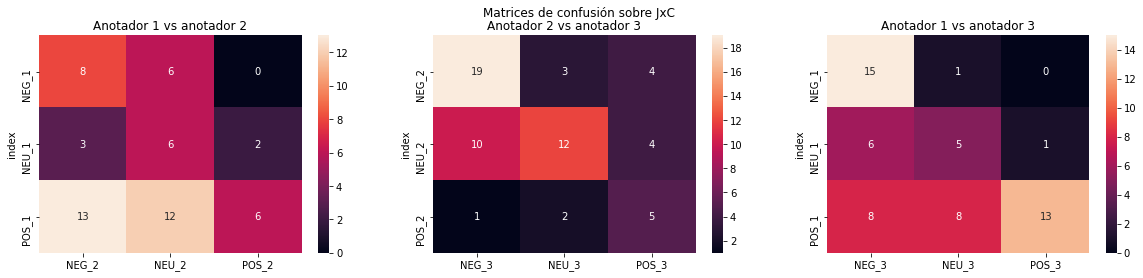

In [203]:
label = "JxC"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")

labels = ["NEG", "NEU", "POS"]


plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 2, 3), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 3), annot=True)

Hummmm acá tenemos varias cosas para ver...



In [204]:
df[(df["JxC_1"] == "POS") & (df["JxC_2"] == "NEG")][["titulo", "JxC_1", "JxC_2"]]

,titulo,JxC_1,JxC_2
id,,,
19972,"Lipovetzky: ""Habrá que ver si Macri querrá continuar liderando el espacio""",POS,NEG
10986,"Urtubey, de raid electoral: por qué se juntó con dos gobernadores de Cambiemos",POS,NEG
1042,El sueño de Pichetto: el candidato a vice de Macri se reunió con el ultraderechista Bolsonaro,POS,NEG
1278,Primera marcha del “Sí se puede”: Mauricio Macri esperó casi 20 minutos el tren y viajó sentado junto a Juliana Awada,POS,NEG
10320,Macri continúa campaña en Misiones y se reúne con pastores evangélicos,POS,NEG
7738,Macri apela a su base electoral con definiciones más conservadoras,POS,NEG
6411,"Campanella lo destrozó a Alberto: mostró lo mejor de Macri y trató de ""ladrones"" a los K",POS,NEG
11528,Macri propondrá la boleta única y el escrutinio por fuera de la órbita del Gobierno,POS,NEG
7786,Macri está jugando a todo o nada,POS,NEG


Anotador 1:

Le parece POS esto?:

- Lipovetzky: "Habrá que ver si Macri querrá continuar liderando el espacio"
- El sueño de Pichetto: el candidato a vice de Macri se reunió con el ultraderechista Bolsonaro

Anotador 2: Le parece NEG esto?

- La cuatro medidas que Macri prometió a las pymes si es reelecto
- Tras las críticas de Elisa Carrió, Mauricio Macri defendió a Rogelio Frigerio: “Todo lo que ha hecho ha sido bajo mi conducción y liderazgo”

In [205]:
df[(df["JxC_1"] == "POS") & (df["JxC_2"] == "NEU")][["titulo", "JxC_1", "JxC_2"]]

,titulo,JxC_1,JxC_2
id,,,
19447,Elecciones 2019: el PJ insiste con las dudas por el escrutinio y el Gobierno afirma que es por temor a que haya balotaje,POS,NEU
15636,"Con PJ dividido, los votos de Macri en PASO alcanzan para ganar la provincial",POS,NEU
19543,El cierre de Macri en Córdoba,POS,NEU
13431,La dureza del debate hizo revivir la polarización entre Macri y Alberto,POS,NEU
9671,"Habló Manuela Ledesma, la mujer tucumana que Mauricio Macri besó en el pie: ""Fue el beso de la patria""",POS,NEU
7936,"Mauricio Macri, optimista con la primera semana del tour ""Sí se puede"": ""La vamos a dar vuelta""",POS,NEU
18476,"Mauricio Macri: “En las PASO estuvimos un poquito distraídos, vamos a cuidar nuestro voto”",POS,NEU
16280,Macri: Vamos a seguir aumentando la producción de alimentos,POS,NEU
18999,Candidato a gobernador del Frente NOS pide votar a Macri en vez de Gómez Centurión,POS,NEU


Anotador 1:

¿Qué tiene de POS esto?

- Siete chicos detenidos por asaltar y golpear a un hermano de Mauricio Macri

(Pareciera Anotador 1 tiende a poner muchos POS en JxC)

In [206]:
df[(df["JxC_1"] == "NEG") & (df["JxC_2"] == "NEU")][["titulo", "JxC_1", "JxC_2"]]

,titulo,JxC_1,JxC_2
id,,,
15042,Macri y el Papa: una relación bipolar que termina (muy) fría,NEG,NEU
17307,Los deudores hipotecarios de créditos UVA rechazan la propuesta de Macri,NEG,NEU
10567,"Un fallo a favor de Miguel ""Tití"" Fernández declaró inconstitucional un decreto de Macri",NEG,NEU
21653,"Daniel Osvaldo, siempre polémico: se grabó quemando boletas de Macri para un asado",NEG,NEU
8736,La crítica del exfutbolista Juan Pablo Sorín al tuit de Mauricio Macri,NEG,NEU
4892,"Alfredo Cornejo, recargado: ""¿Qué puta tienen que venir Macri y Alberto Fernández?""",NEG,NEU


In [207]:
df[(df["JxC_2"] == "NEG") & (df["JxC_3"] == "POS")][["titulo", "JxC_2", "JxC_3"]]

,titulo,JxC_2,JxC_3
id,,,
6411,"Campanella lo destrozó a Alberto: mostró lo mejor de Macri y trató de ""ladrones"" a los K",NEG,POS
16062,"Mauricio Macri, contra el kirchnerismo: “Creen que ya ganaron y empezaron a perseguir periodistas antes de asumir”",NEG,POS
13804,"Tras el debate presidencial, Mauricio Macri cruzó a Alberto Fernández: “Piensa que puede decir cualquier mentira”",NEG,POS
3803,La cuatro medidas que Macri prometió a las pymes si es reelecto,NEG,POS


A anotador 2:

Le parece NEG 

- Campanella lo destrozó a Alberto: mostró lo mejor de Macri y trató de "ladrones" a los K
- La cuatro medidas que Macri prometió a las pymes si es reelecto

In [208]:
df[(df["JxC_1"] == "POS") & (df["JxC_3"] == "NEG")][["titulo", "JxC_1", "JxC_3"]]

,titulo,JxC_1,JxC_3
id,,,
19447,Elecciones 2019: el PJ insiste con las dudas por el escrutinio y el Gobierno afirma que es por temor a que haya balotaje,POS,NEG
19972,"Lipovetzky: ""Habrá que ver si Macri querrá continuar liderando el espacio""",POS,NEG
1042,El sueño de Pichetto: el candidato a vice de Macri se reunió con el ultraderechista Bolsonaro,POS,NEG
13431,La dureza del debate hizo revivir la polarización entre Macri y Alberto,POS,NEG
7738,Macri apela a su base electoral con definiciones más conservadoras,POS,NEG
11528,Macri propondrá la boleta única y el escrutinio por fuera de la órbita del Gobierno,POS,NEG
18476,"Mauricio Macri: “En las PASO estuvimos un poquito distraídos, vamos a cuidar nuestro voto”",POS,NEG
6025,"Tras las críticas de Elisa Carrió, Mauricio Macri defendió a Rogelio Frigerio: “Todo lo que ha hecho ha sido bajo mi conducción y liderazgo”",POS,NEG


# FIT


<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

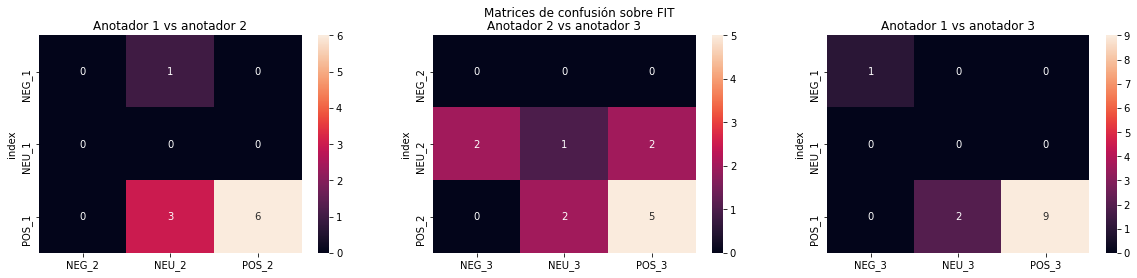

In [210]:
label = "FIT"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")

labels = ["NEG", "NEU", "POS"]


plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 2, 3), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 3), annot=True)

No mucho que decir

## Lavagna

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

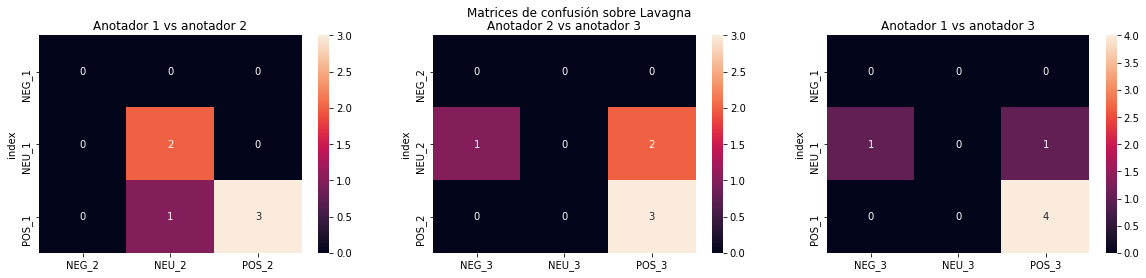

In [209]:
label = "Lavagna"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")

labels = ["NEG", "NEU", "POS"]


plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 2, 3), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 3), annot=True)

Idem